In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
pd.set_option("display.max_columns", None)
sns.set(style = "white")

In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 7.]

In [3]:
battles = pd.read_csv("dataset/battles.csv")
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


This dataset was collected by [Chris Albon](https://github.com/chrisalbon/war_of_the_five_kings_dataset) from [A Wiki of Ice and Fire](http://awoiaf.westeros.org/index.php/Main_Page). 

The dataset contains 38 battles in the War of the Five Kings, the principal military conflict depicted in the first three novels of George R.R. Martin's *A Song of Ice and Fire* series. The story roughly corresponds to the first four seasons of *Game of Thrones*, the TV adaptation of the fantasy series.

## Number of Battles per Year

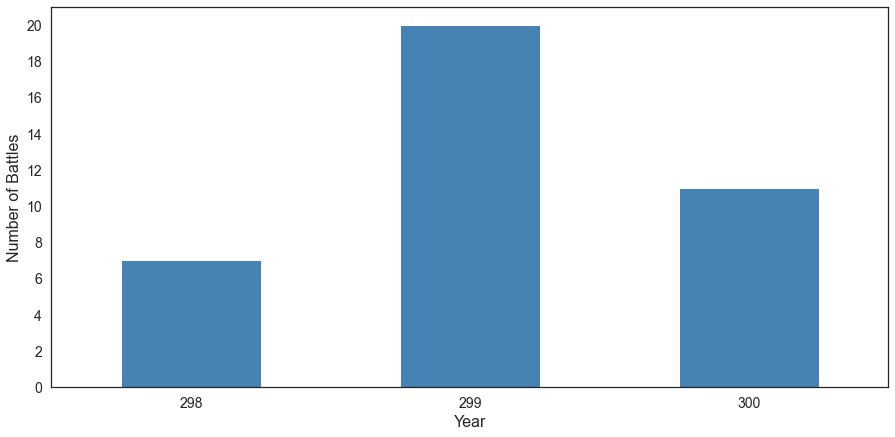

In [4]:
p = battles.groupby("year").count()["battle_number"].plot.bar(rot = 0, color = "steelblue")
_ = p.set(xlabel = "Year", ylabel = "Number of Battles"), plt.yticks(range(0, 21, 2))

## Number of Battles per Region

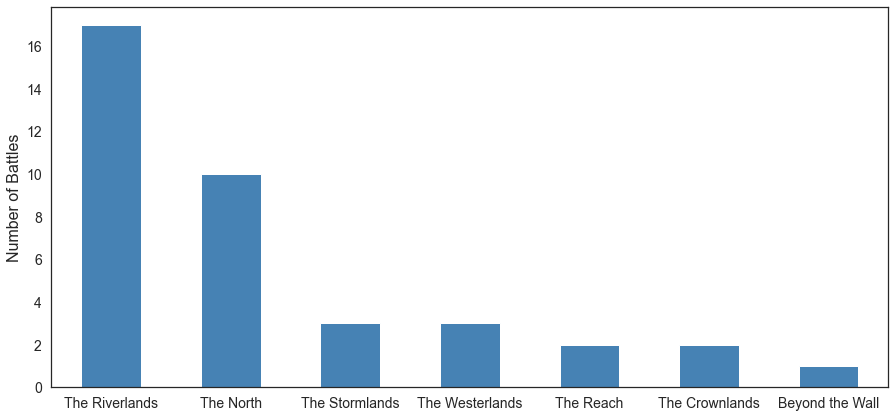

In [5]:
p = battles["region"].value_counts().plot.bar(rot = 0, color = "steelblue")
_ = p.set(ylabel = "Number of Battles")

## The King who Fought the Most Battles

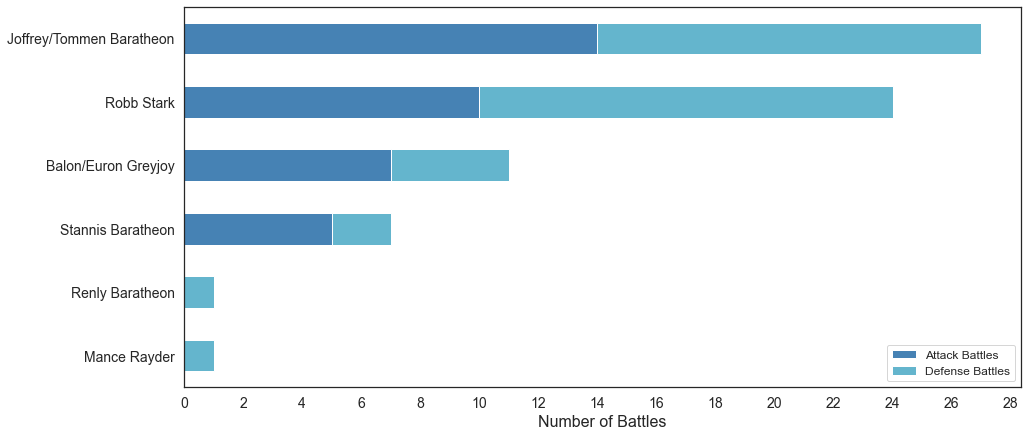

In [6]:
attacker = pd.DataFrame(battles.attacker_king.value_counts())
defender = pd.DataFrame(battles.defender_king.value_counts())
data = attacker.merge(defender, how = "outer", left_index = True, right_index = True).fillna(0)
data.loc[:, "Sum"] = data.attacker_king + data.defender_king
p = data.sort_values(["Sum", "attacker_king"]).loc[:, ["attacker_king", "defender_king"]].plot.barh(rot = 0, stacked = True, color = ["steelblue", sns.color_palette()[9]])
plt.xticks(np.arange(0, max(data.Sum) + 2, 2))
_ = p.set(xlabel = "Number of Battles"), p.legend(["Attack Battles", "Defense Battles"])

King Joffrey/Tommen Baratheon fought the most battles. At the same time, he was also the king who attacked the most.

## Top Rivalries

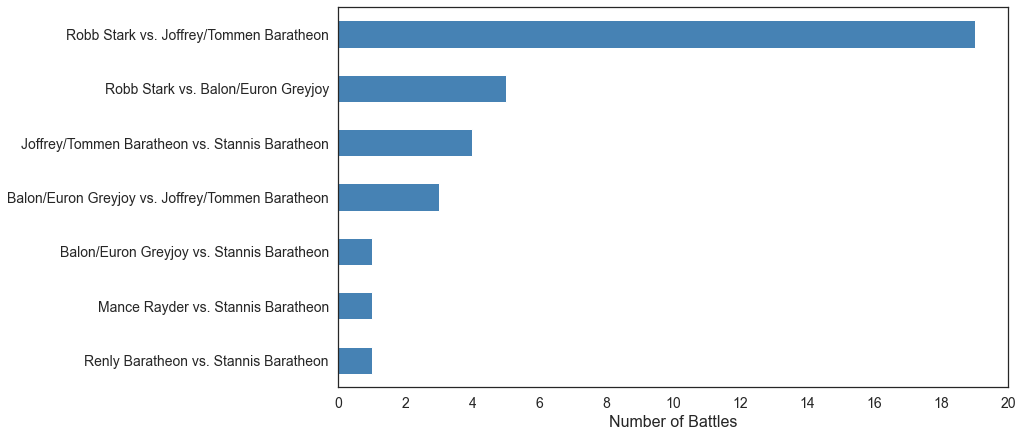

In [7]:
temp = battles.dropna(subset = ["attacker_king", "defender_king"]).copy(deep = True)
c = list(Counter([tuple(set(x)) for x in temp[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
data = pd.DataFrame(c).sort_values(1)
p = data.plot.barh(color = "steelblue", figsize = (12, 7))
_ = plt.xticks(np.arange(0, max(data[1]) + 2, 2))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in data[0]], xlabel = "Number of Battles"), p.legend().remove()

More than half of the battles were between Joffrey/Tommen Baratheon and Robb Stark. 

## Houses that Fought the Most Battles

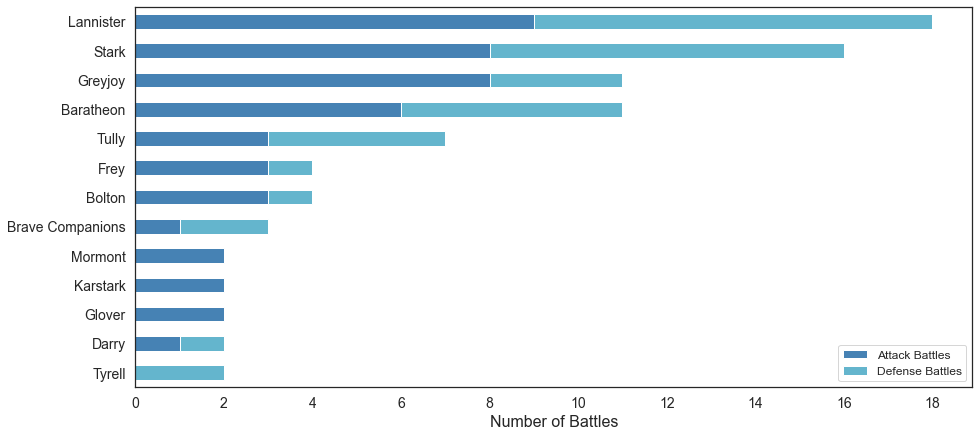

In [8]:
attacker_dict = {}
for column in ["attacker_1", "attacker_2", "attacker_3", "attacker_4"]:
    val_count = battles[column].value_counts()
    for index, value in val_count.items():
        attacker_dict[index] = attacker_dict.get(index, 0) + value
        
defender_dict = {}
for column in ["defender_1", "defender_2", "defender_3", "defender_4"]:
    val_count = battles[column].value_counts()
    for index, value in val_count.items():
        defender_dict[index] = defender_dict.get(index, 0) + value

attacker_df = pd.DataFrame.from_dict(attacker_dict, orient = "index", columns = ["attacker"])
defender_df = pd.DataFrame.from_dict(defender_dict, orient = "index", columns = ["defender"])

data = attacker_df.merge(defender_df, how = "outer", left_index = True, right_index = True).fillna(0)
data.loc[:, "Sum"] = data.iloc[:,0] + data.iloc[:,1]
data = data[data.Sum > 1]
p = data.sort_values(["Sum", "attacker"]).iloc[:, 0:2].plot.barh(rot = 0, stacked = True, color = ["steelblue", sns.color_palette()[9]])
plt.xticks(np.arange(0, max(data.Sum) + 2, 2))
_ = p.set(xlabel = "Number of Battles"), p.legend(["Attack Battles", "Defense Battles"])

The Lannisters is the house that fought the most battles, followed by the Starks. In addition, the Lannisters, the Starks, and the Greyjoys are among the houses that attacked most often. 

Note that this bar plot excluded 8 houses/groups that only fought one battle.

## Attacker Advantage

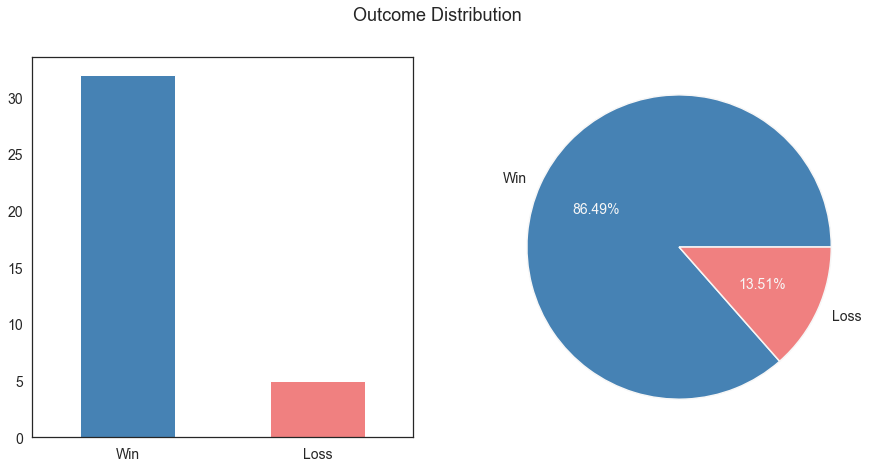

In [9]:
data = battles.loc[battles.attacker_outcome.notna()].copy(deep = True)
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Outcome Distribution", fontsize = 18.)
_ = data.attacker_outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = ["steelblue", "lightcoral"]).set(xticklabels = ["Win", "Loss"])
_ = data.attacker_outcome.value_counts().plot.pie(labels = ("Win", "Loss"), autopct = "%.2f%%", label = "", fontsize = 14., ax = ax[1],\
colors = ["steelblue", "lightcoral"], wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

As one may observe, a vast majority of attackers ended up winning the battle. This attacker advantage might due to several possible reasons:
1. Communication was slow in the *Game of Thrones* world, thus attackers oftentimes could catch defenders off guard.
2. The party with greater advantage or confidence might be more likely to attack.

## Impact of Army Size on Battle Outcome

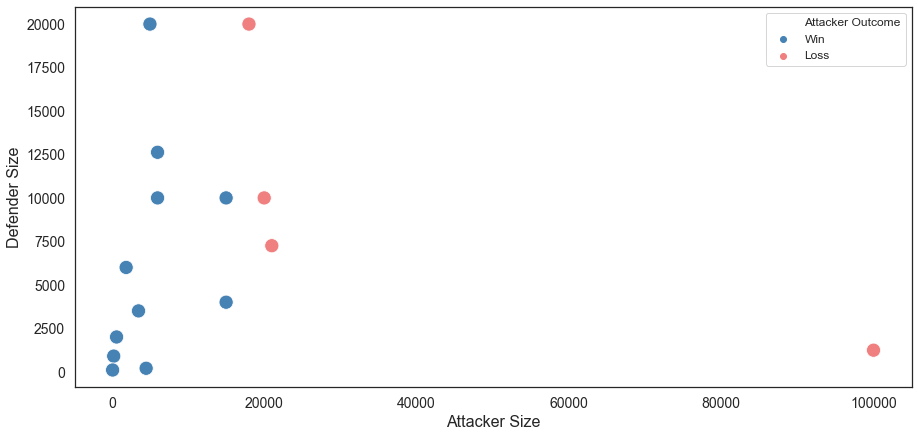

In [10]:
data = battles.dropna(subset = ["attacker_size", "defender_size", "attacker_outcome"]).copy(deep = True)
p = sns.scatterplot("attacker_size", "defender_size", hue = "attacker_outcome", palette = ["steelblue", "lightcoral"], data = data, s = 200)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size")
legend = p.legend()
legend.texts[0].set_text("Attacker Outcome")
legend.texts[1].set_text("Win")
legend.texts[2].set_text("Loss")

The bottom right point seems surprising--how could the attacker lose with such an enormous army size? Let's take a closer look at this battle.

In [11]:
data.loc[data.attacker_size == max(data.attacker_size)]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
27,Battle of Castle Black,300,28,Stannis Baratheon,Mance Rayder,Free folk,Thenns,Giants,NaN,Night's Watch,Baratheon,NaN,NaN,loss,siege,1.0,1.0,100000.0,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN


According to [Game of Thrones Wiki](https://gameofthrones.fandom.com/wiki/Battle_of_Castle_Black), the 100,000 undisciplined wildlings were only expecting attacks from the Night's Watch and left their eastern flank totally undefended. Stannis's army took the wildlings by complete surprise and quickly finished the battle by capturing Mance Rayder. 

Notice the *attacker_king* and *defender_king* should be switched for this row. The attacker king should be Mance Rayder and the defender king should be Stannis Baratheon. 

In [12]:
battles.loc[27, "attacker_king"] = "Mance Rayder"
battles.loc[27, "defender_king"] = "Stannis Baratheon"

Fortunately, this error does not affect our analyses about army sizes. For the previous "The King who Fought the Most Battles" plot, however, one of the attack battle should actually be defense battle. Fill free to re-run the corresponding code cell to update the result.

## Commander Who Fought the Most Battles

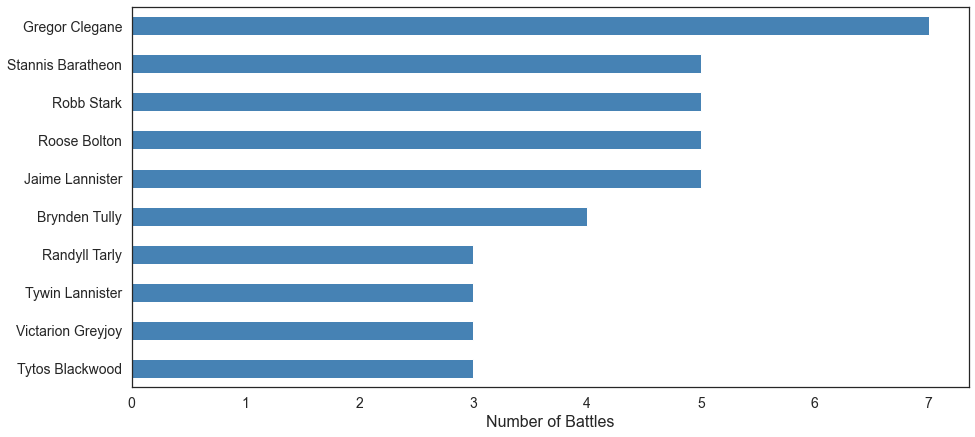

In [13]:
attacker = battles.dropna(subset = ["attacker_commander"]).copy(deep = True)
defender = battles.dropna(subset = ["defender_commander"]).copy(deep = True)

d = {}

for names in attacker["attacker_commander"].values:
    name_lst = names.split(", ")
    for name in name_lst:
        d[name] = d.get(name, 0) + 1

for names in defender["defender_commander"].values:
    name_lst = names.split(", ")
    for name in name_lst:
        d[name] = d.get(name, 0) + 1
        
data  = pd.DataFrame.from_dict(d, orient = "index", columns = ["Count"])
p = data.loc[data.Count > 2].sort_values("Count").plot.barh(color = "steelblue")
plt.xticks(np.arange(0, max(data.Count) + 1, 1))
_ = p.set(xlabel = "Number of Battles"), p.legend().remove()

Note that the plot does not include commanders who have only fought 2 battle or below.

## Commander Who Won the Most Battles

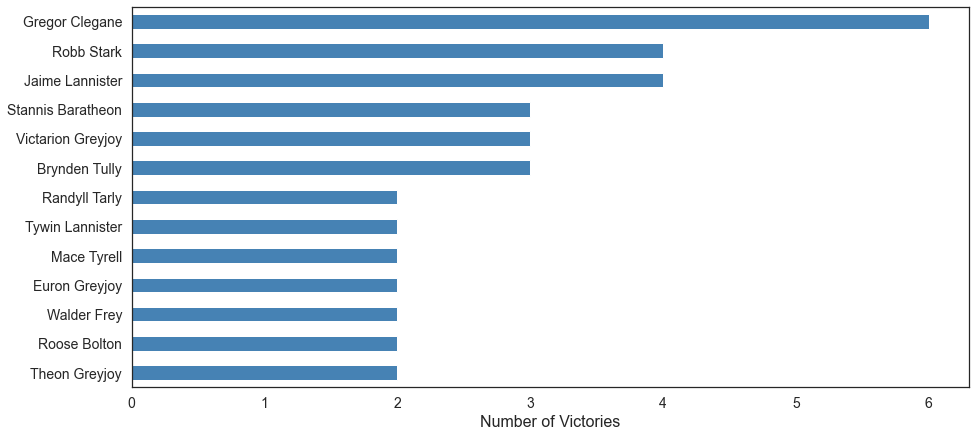

In [14]:
attacker = battles.dropna(subset = ["attacker_commander", "attacker_outcome"]).copy(deep = True)
defender = battles.dropna(subset = ["defender_commander", "attacker_outcome"]).copy(deep = True)

d = {}

for pair in attacker[["attacker_commander", "attacker_outcome"]].values:
    name_lst, outcome = pair[0].split(", "), pair[1]
    for name in name_lst:
        if outcome == "win":
            d[name] = d.get(name, 0) + 1

for pair in defender[["defender_commander", "attacker_outcome"]].values:
    name_lst, outcome = pair[0].split(", "), pair[1]
    for name in name_lst:
        if outcome == "loss":
            d[name] = d.get(name, 0) + 1

data  = pd.DataFrame.from_dict(d, orient = "index", columns = ["Count"])
p = data.loc[data.Count > 1].sort_values("Count").plot.barh(color = "steelblue")
plt.xticks(np.arange(0, max(data.Count) + 1, 1))
_ = p.set(xlabel = "Number of Victories"), p.legend().remove()

Note that the plot does not include commanders who have only won 1 battle.